# Assignment 7 (Dimensionality Reduction)

1. Download mushrooms.csv from Kaggle.com and perform the Principal Component Analysis
(PCA) on the dataset.
2. Perform Linear Discriminant Analysis (LDA) on IRIS dataset.

 Feature selection and extraction are one of the most important steps that must be performed in
order for machine learning to be successful

In [1]:
#1 PCA
#it reduce dimention of data(if more than 3 variable mean mode dimension) to posible dimension like 2d .
#help to select variable which is more important and accurate 2d graph is
#where we need pca :if model overfitting

#download data set
#!/bin/bash
!kaggle datasets download uciml/mushroom-classification


Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 33.4MB/s]


In [2]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


Check if model over fitting or not

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
   # Load the data
   data = pd.read_csv('mushrooms.csv')
   # Assuming the file was extracted in the previous step

   # Encode categorical features using Label Encoding
   labelencoder = LabelEncoder()
   for column in data.columns:
       data[column] = labelencoder.fit_transform(data[column])

   # Split the data into training and testing sets
   X = data.drop('class', axis=1)  # Features
   y = data['class']  # Target variable
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   # Adjust test_size and random_state as needed

In [7]:
model = LogisticRegression(max_iter=10000)  # Increase max_iter if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [8]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9516848745960917
Testing Accuracy: 0.9476923076923077


PCA

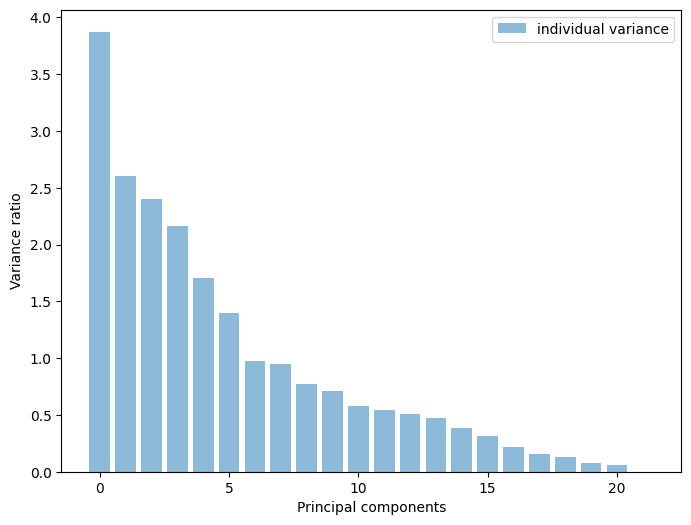

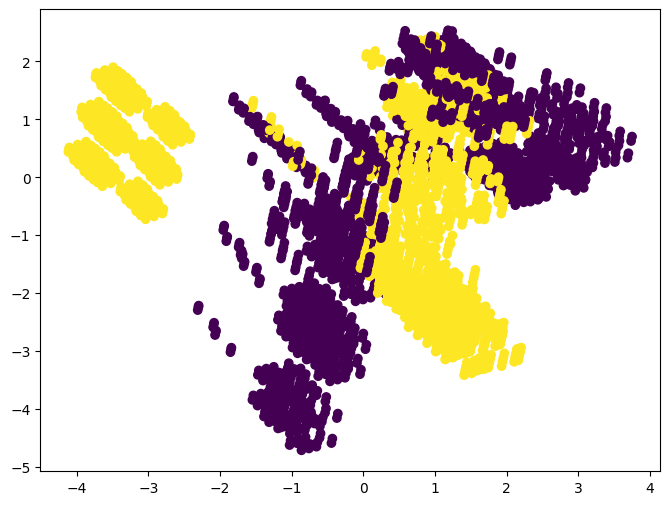

In [9]:
# PRINCIPAL COMPONENT ANALYSIS (PCA)

# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
m_data = pd.read_csv('mushrooms.csv')

# Machine learning systems work with integers, we need to encode string characters into ints
encoder = LabelEncoder()
# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])

X_features = m_data.iloc[:, 1:23]
y_label = m_data.iloc[:, 0]

# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

# Project data onto 3 principal components for 3D visualization
pca2 = PCA(n_components=3)
pca2.fit(X_features)
X_3d = pca2.transform(X_features)

plt.figure(figsize=(8, 6))
plt.scatter(X_3d[:, 0], X_3d[:, 1], c=m_data['class'])
plt.show()


In [ ]:
#LDA
#2.  Linear discriminant analysis #


In [12]:
# Step 1: Load Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 2: Load the Data
# For this example, we’ll use the iris dataset from the sklearn library.
# The following code shows how to load this dataset and convert it to a pandas DataFrame to make it easy to work with:

# Load iris dataset
iris = datasets.load_iris()

# Convert dataset to pandas DataFrame
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

# View first six rows of DataFrame
df.head()

# Define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

# Step 3: Fit the LDA Model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

# Step 4: Use the Model to Make Predictions
# To evaluate model performance, we'll use repeated stratified K-fold cross-validation.
# For this example, we’ll use 10 folds and 3 repeats.

# Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

# Predict on new observation
new = [[5, 3, 1, 4]]
print(model.predict(new))



0.9800000000000001
['virginica']


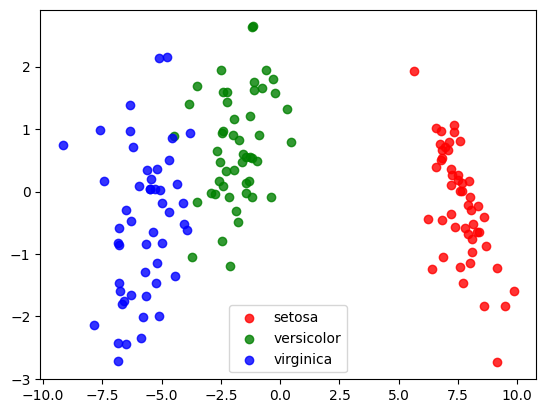

In [13]:
# Step 5: Visualize the Results
# Visualize the LDA model to view the linear discriminants and see how it separates the species.

# Define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

# Create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color, label=target_name)

# Add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Display LDA plot
plt.show()


PCA: An unsupervised technique that reduces dimensions by maximizing data variance, ignoring class labels. It's used for data compression and visualization.

LDA: A supervised technique that reduces dimensions by maximizing class separability. It considers class labels, making it useful for classification tasks.